In [1]:
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image, ImageDraw

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the trained model
trained_model = load_model('/content/drive/MyDrive/Robo_final/new_trained_ternaus_lat.keras')
print("Trained model loaded")

Trained model loaded


In [ ]:
test_images = np.load('/content/drive/MyDrive/Robo_final/Prepocessed numpy/test_images.npy')
test_binary_masks = np.load('/content/drive/MyDrive/Robo_final/Prepocessed numpy/test_binary_masks.npy')

print("Testing data loaded")

Testing data loaded


In [ ]:
predictions_trained = trained_model.predict(test_images)

5/5 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step


In [ ]:
predictions_trained.shape

(146, 256, 256, 1)

In [ ]:
np.max(predictions_trained)

1.0

In [ ]:
threshold1 = 0.2
threshold2 = 0.4
threshold3 = 0.5
predictions_trained_threshold1 = (predictions_trained > threshold1).astype(np.uint8)
predictions_trained_threshold2 = (predictions_trained > threshold2).astype(np.uint8)
predictions_trained_threshold3 = (predictions_trained > threshold3).astype(np.uint8)

import matplotlib.pyplot as plt


for index in [30,40,32,64,75,91,130,131,132,135,140,139,142,143]:

  plt.figure(figsize=(30,24))

  plt.subplot(1, 5, 1)
  plt.imshow(test_images[index])
  plt.title('Test Image')
  plt.axis('off')

  plt.subplot(1, 5, 2)
  plt.imshow(test_binary_masks[index], cmap='gray')
  plt.title('Actual Mask')
  plt.axis('off')

  plt.subplot(1, 5, 3)
  plt.imshow(predictions_trained_threshold1[index], cmap='gray')
  plt.title('Predicted Mask (With threshold set at {})'.format(threshold1))
  plt.axis('off')

  plt.subplot(1, 5, 4)
  plt.imshow(predictions_trained_threshold2[index], cmap='gray')
  plt.title('Predicted Mask (With threshold set at {})'.format(threshold2))
  plt.axis('off')

  plt.subplot(1, 5, 5)
  plt.imshow(predictions_trained_threshold3[index], cmap='gray')
  plt.title('Predicted Mask (With threshold set at {})'.format(threshold3))
  plt.axis('off')
  # plt.show()

# plt.title('Predicted Mask (With threshold set at {})'.format(threshold))


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for index in range(28):
  if index < 5:
    continue
  plt.figure(figsize=(17,7))

  plt.subplot(1, 3, 1)
  plt.imshow(test_images[index])
  plt.title('Test Image')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(predictions_trained_threshold1[index], cmap='gray')
  plt.title('Predicted Binary Mask (Threshold = {})'.format(threshold1))
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(predictions_trained_threshold1[index])
  plt.imshow(test_images[index] , alpha=0.6)
  plt.title('Predicted Binary Mask Overlayed on Test Image')
  plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn.metrics import r2_score, f1_score, precision_score, recall_score, accuracy_score

actual_mask_1d = test_binary_masks.flatten()
predicted_mask_1d1 = predictions_trained_threshold1.flatten()
predicted_mask_1d2 = predictions_trained_threshold2.flatten()
predicted_mask_1d3 = predictions_trained_threshold3.flatten()

print("PERFORMANCE METRICS\n")

print("With threshold", threshold1, ":")
f1 = f1_score(actual_mask_1d, predicted_mask_1d1)
print("F1 Score:", f1)
precision = precision_score(actual_mask_1d, predicted_mask_1d1)
print("Precision:", precision)
recall = recall_score(actual_mask_1d, predicted_mask_1d1)
print("Recall:", recall)
accuracy = accuracy_score(actual_mask_1d, predicted_mask_1d1)
print("Accuracy:", accuracy)
print("\n")

print("With threshold", threshold2, ":")
f1 = f1_score(actual_mask_1d, predicted_mask_1d2)
print("F1 Score:", f1)
precision = precision_score(actual_mask_1d, predicted_mask_1d2)
print("Precision:", precision)
recall = recall_score(actual_mask_1d, predicted_mask_1d2)
print("Recall:", recall)
accuracy = accuracy_score(actual_mask_1d, predicted_mask_1d2)
print("Accuracy:", accuracy)
print("\n")

print("With threshold", threshold3, ":")
f1 = f1_score(actual_mask_1d, predicted_mask_1d3)
print("F1 Score:", f1)
precision = precision_score(actual_mask_1d, predicted_mask_1d3)
print("Precision:", precision)
recall = recall_score(actual_mask_1d, predicted_mask_1d3)
print("Recall:", recall)
accuracy = accuracy_score(actual_mask_1d, predicted_mask_1d3)
print("Accuracy:", accuracy)
print("\n")

PERFORMANCE METRICS

With threshold 0.2 :
F1 Score: 0.9484709458911895
Precision: 0.9144902658984928
Recall: 0.9850743948605084
Accuracy: 0.9704943095168023


With threshold 0.4 :
F1 Score: 0.9558213977423732
Precision: 0.9401189195452369
Recall: 0.9720573320973682
Accuracy: 0.9752294462021083


With threshold 0.5 :
F1 Score: 0.9566146184979978
Precision: 0.9488548035292819
Recall: 0.964502400843186
Accuracy: 0.975883274862211




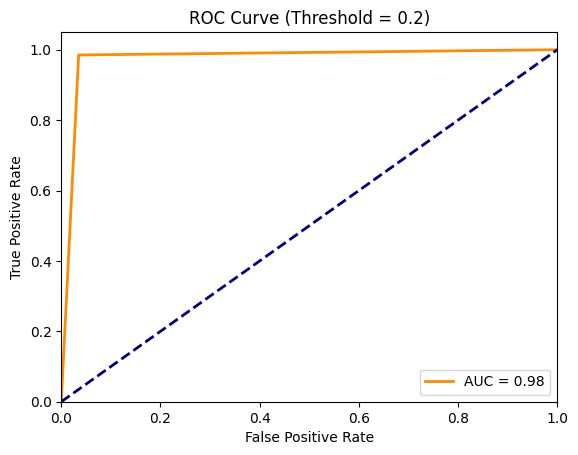

In [ ]:
# Compute ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(actual_mask_1d, predicted_mask_1d1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Threshold = {})'.format(threshold1))
plt.legend(loc="lower right")
plt.show()



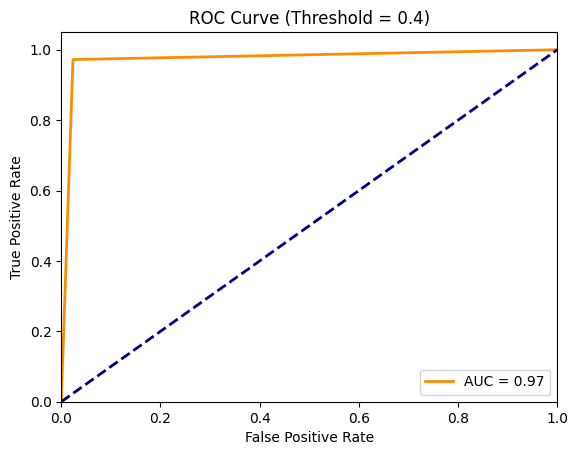

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_mask_1d, predicted_mask_1d2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Threshold = {})'.format(threshold2))
plt.legend(loc="lower right")
plt.show()

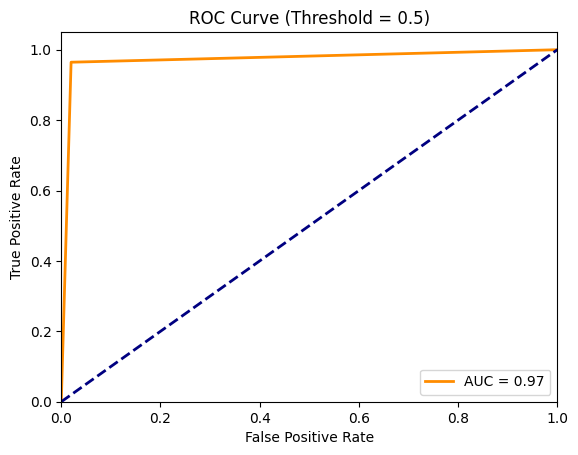

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_mask_1d, predicted_mask_1d3)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Threshold = {})'.format(threshold3))
plt.legend(loc="lower right")
plt.show()

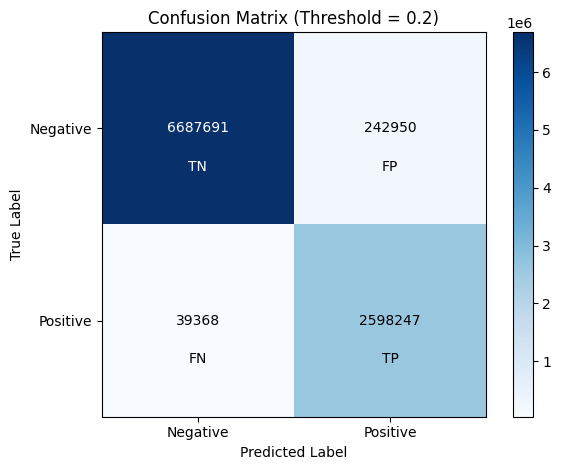

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(actual_mask_1d, predicted_mask_1d1)

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Threshold = {})'.format(threshold1))
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])

tp_color = 'black'
tn_color = 'white'
fp_color = 'black'
fn_color = 'black'

# Annotate confusion matrix with numbers and TP/TN/FP/FN labels
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")
        if i == j:
            plt.text(j, i+0.2, 'TN' if i == 0 else 'TP',
                     ha="center", va="center", fontsize=10, color=tn_color if i == 0 else tp_color)
        else:
            plt.text(j, i+0.2, 'FN' if i > j else 'FP',
                     ha="center", va="center", fontsize=10, color=fn_color if i > j else fp_color)

plt.tight_layout()
plt.show()


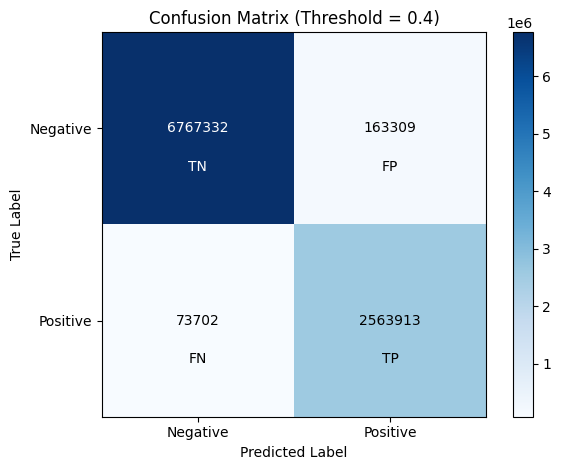

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(actual_mask_1d, predicted_mask_1d2)

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Threshold = {})'.format(threshold2))
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])

# Annotate confusion matrix with numbers and TP/TN/FP/FN labels
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")
        if i == j:
            plt.text(j, i+0.2, 'TN' if i == 0 else 'TP',
                     ha="center", va="center", fontsize=10, color=tn_color if i == 0 else tp_color)
        else:
            plt.text(j, i+0.2, 'FN' if i > j else 'FP',
                     ha="center", va="center", fontsize=10, color=fn_color if i > j else fp_color)

plt.tight_layout()
plt.show()

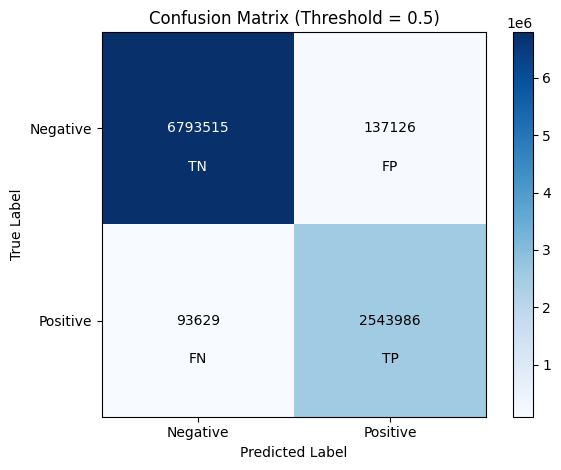

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(actual_mask_1d, predicted_mask_1d3)

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Threshold = {})'.format(threshold3))
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])

# Annotate confusion matrix with numbers and TP/TN/FP/FN labels
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")
        if i == j:
            plt.text(j, i+0.2, 'TN' if i == 0 else 'TP',
                     ha="center", va="center", fontsize=10, color=tn_color if i == 0 else tp_color)
        else:
            plt.text(j, i+0.2, 'FN' if i > j else 'FP',
                     ha="center", va="center", fontsize=10, color=fn_color if i > j else fp_color)

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model  # For loading .h5 models
from google.colab import files  # For downloading files in Colab

# Load your trained model (in .h5 format)
model = load_model('/content/drive/MyDrive/Robo_final/new_trained_ternaus_lat.keras')

# Split the video into frames
video_path = '/content/drive/MyDrive/Final/realtime_videos/1.mp4'
cap = cv2.VideoCapture(video_path)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the output video path
output_video_path = '/content/drive/MyDrive/Final/realtime_video_out/1_out.mp4'
out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# Set the best threshold
threshold = 0.5

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame
    input_frame = cv2.resize(frame, (256, 256))  # Resize to model's input size
    input_frame = input_frame / 255.0  # Normalize
    input_frame = np.expand_dims(input_frame, axis=0)

    # Predict the lane mask
    mask = model.predict(input_frame)[0]
    mask = (mask > threshold).astype(np.uint8) * 255  # Apply threshold

    # Resize mask to original frame size
    mask_resized = cv2.resize(mask, (frame_width, frame_height))

    # Overlay the mask on the original frame
    overlay = cv2.addWeighted(frame, 0.8, cv2.cvtColor(mask_resized, cv2.COLOR_GRAY2BGR), 0.2, 0)

    # Write the frame to the output video
    out.write(overlay)

cap.release()
out.release()
cv2.destroyAllWindows()

# Download the output video
files.download(output_video_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━

error: OpenCV(4.11.0) /io/opencv/modules/highgui/src/window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


Picture prediction

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab import files

# Load your trained model
model = load_model('/content/drive/MyDrive/Robo_final/new_trained_ternaus_lat.keras')

def predict_road(image_path, output_path, threshold=0.5):
    # Load the input image
    frame = cv2.imread(image_path)
    original_size = (frame.shape[1], frame.shape[0])  # Store original dimensions

    # Preprocess the image
    input_frame = cv2.resize(frame, (256, 256))  # Resize to model input size
    input_frame = input_frame / 255.0  # Normalize
    input_frame = np.expand_dims(input_frame, axis=0)

    # Predict the road mask
    mask = model.predict(input_frame)[0]
    mask = (mask > threshold).astype(np.uint8) * 255  # Apply threshold

    # Resize mask to original image size
    mask_resized = cv2.resize(mask, original_size)

    # Apply morphological operations to refine the mask
    kernel = np.ones((5, 5), np.uint8)
    mask_resized = cv2.morphologyEx(mask_resized, cv2.MORPH_CLOSE, kernel)

    # Overlay the mask on the original image
    overlay = cv2.addWeighted(frame, 0.7, cv2.cvtColor(mask_resized, cv2.COLOR_GRAY2BGR), 0.3, 0)

    # Save the output image
    cv2.imwrite(output_path, overlay)
    print(f"Output saved at {output_path}")

    # Download the output image
    files.download(output_path)

# Provide the input image path and output path
image_path = '/content/drive/MyDrive/Final/001577_leftImg8bit.png'  # Change to your image path
output_path = '/content/drive/MyDrive/Final/out_images1.jpg'

# Call the function
predict_road(image_path, output_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Output saved at /content/drive/MyDrive/Final/out_images1.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#sky remove

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model  # For loading .h5 models
from google.colab import files  # For downloading files in Colab

# Load your trained model (in .h5 format)
model = load_model('/content/drive/MyDrive/Robo_final/new_trained_ternaus_50.keras')

# Split the video into frames
video_path = '/content/drive/MyDrive/Robo_final/test_video.mp4'
cap = cv2.VideoCapture(video_path)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the output video path
output_video_path = '/content/drive/MyDrive/Robo_final/output_video_Withoutsky.mp4'
out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# Set the best threshold
threshold = 0.5

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame
    input_frame = cv2.resize(frame, (256, 256))  # Resize to model's input size
    input_frame = input_frame / 255.0  # Normalize
    input_frame = np.expand_dims(input_frame, axis=0)

    # Predict the lane mask
    mask = model.predict(input_frame)[0]
    mask = (mask > threshold).astype(np.uint8) * 255  # Apply threshold

    # Resize mask to original frame size
    mask_resized = cv2.resize(mask, (frame_width, frame_height))

    # Remove sky regions from the mask
    height, width = mask_resized.shape
    sky_threshold = int(height * 0.4)  # Top 40% of the frame
    mask_resized[:sky_threshold, :] = 0

    # Filter small regions using contour analysis
    contours, _ = cv2.findContours(mask_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_mask = np.zeros_like(mask_resized)
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Area threshold
            cv2.drawContours(filtered_mask, [contour], -1, 255, thickness=cv2.FILLED)

    # Update the mask with filtered regions
    mask_resized = filtered_mask

    # Overlay the mask on the original frame
    overlay = cv2.addWeighted(frame, 0.8, cv2.cvtColor(mask_resized, cv2.COLOR_GRAY2BGR), 0.2, 0)

    # Write the frame to the output video
    out.write(overlay)

cap.release()
out.release()
cv2.destroyAllWindows()

# Download the output video
files.download(output_video_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━

error: OpenCV(4.11.0) /io/opencv/modules/highgui/src/window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'
